In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
# see also the "datetime" package
import solutions

# Part 2: Speed Racer!
Let's figure out which of the solutions from last week is the fastest. 

To do this, we want to evaluate the runtime for a varying number of coordinates.

In [2]:
# This tells you the system time in seconds (from some system-dependent zero point)
time.time()

1461712720.709795

**NOTE:** this is *not* the best way to measure time, but it illustrates how the process works. 

Read about the [timeit](https://docs.python.org/2/library/timeit.html) module, and definitely the doccumentation of the [time](https://docs.python.org/3.5/library/time.html) module we're using.

In [6]:
# here's a simple way to determine how long something takes to evaluate:
t0 = time.time()

# do some random task

x = -1
for k in range(0,100000):
    x = k*x

t1 = time.time()

duration = t1 - t0
print('This task took: ' + str(duration) + ' seconds')

This task took: 0.013350963592529297 seconds


In [7]:
# here's how you might return two numbers or arrays from a function

def myfunc(a):
    out1 = a+2
    out2 = a-2
    return out1, out2


In [8]:
x, y = myfunc(7)
print(x,y)

9 5


In [10]:
# an example of random numbers uniformly chosen in the range -5 to 5

# note, other random number distributions exist, and are very useful (e.g. Gaussian!)

N = 20

rmax = 5
rmin = -5

rando_calrissian = np.random.random(N) * (rmax - rmin) + rmin

rando_calrissian

array([ 2.32161005, -0.76674685, -1.65934665,  4.03519896,  4.64025515,
       -0.24544918,  4.88638341, -1.32652149,  3.78445772,  2.84475865,
       -4.03472162,  1.42812367, -2.3970574 ,  2.38200266,  2.79541087,
       -0.1980926 , -0.5385668 , -2.67934267,  4.47944027,  2.09545681])

# Part 3: Write some unit tests

**unittest**: There *is* a [built-in framework](https://docs.python.org/2.7/library/unittest.html) for formally handling unit tests. It is a little difficult to start using, and we won't use it today. There are some nicer testing suites available (e.g. [nose](https://nose.readthedocs.org/en/latest/))

**Exceptions**: Python defines a bunch of [built-in exceptions](https://docs.python.org/2/library/exceptions.html) that can come up when code crashes. In general you'll try to [catch these](https://wiki.python.org/moin/HandlingExceptions) and handle them gracefully. Usually I write Try/Except statements as I find these errors


In [11]:
def number_test(input):
    '''
    An example of using a Try/Except statement to catch an error.
    You could imagine doing something more useful than just printing stuff to the screen...
    '''
    try:
        val = float(input)
        print('Yup...')
    except ValueError:
        print("Not a float!")

In [13]:
a = 'hamburger'
b = 123.45

number_test(b)

Yup...


In [15]:
def constell_christenson(ra,dec):
    '''
    This is a function to determine the constellation in which an object is located from its ra and dec
    Written by @hmchristenson 
    
    Parameters
    -------
    ra: float
        Right ascension
    dec: float
        Declination
        
    Returns
    -------
    output: string
        Name of the constellation in which the object is located
    '''
    RAl, RAu, Decl, = np.loadtxt('data/data.txt', delimiter=',', usecols=(0,1,2), unpack=True)
    names = np.loadtxt('data/data.txt', delimiter=',', usecols=(3,), unpack=True, dtype='str')
    
    count = 0

    while(Decl[count] > dec):
        count = count + 1
    dec_low = Decl[count]
    
    while(RAu[count] <= ra):
        count = count + 1
    ra_up = RAu[count]

    while(RAl[count] > ra or RAu[count] < ra):
        count = count + 1 
    ra_low = RAl[count]
       
    output = names[count]
    
    return output

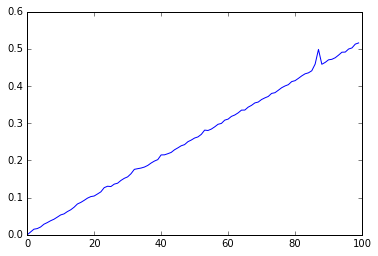

In [45]:
def constell_runtime_test (N):
    RaArray = np.random.random(N)*24
    DecArray = np.random.random(N)*180 - 90
    
    t = np.zeros(2*N)
    
    for i in range(N):
        t[-i] = time.time()
        for j in range(i):
            
            constell_christenson(RaArray[j], DecArray[j])
            
        t[i] = time.time()
    
    T = np.zeros(2*N)
    
    for i in range(N):
        T[i] = t[i] - t[-i]
    
    i = range(N)
    
    plt.plot(i, T[i])

constell_runtime_test(100)